In [1]:
pip install --upgrade shap

   ---------------------------------------- 0.0/546.8 kB ? eta -:--:--
   ------------ --------------------------- 174.1/546.8 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------  542.7/546.8 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 546.8/546.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.48.0
    Uninstalling shap-0.48.0:
      Successfully uninstalled shap-0.48.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade shap numpy pandas matplotlib seaborn

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

In [25]:
df = pd.read_csv(r'D:\2025 Work\Harish Panghal\Worked Data\HP Data worked data 1\Data.csv', encoding='ISO-8859-1')

In [27]:
print(df.columns.tolist())

['NFA (kg/m³)', 'NCA (kg/m³)', 'ATRCA (kg/m³)', 'HTRCA (kg/m³)', 'CTRCA (kg/m³)', 'ACTRCA (kg/m³)', 'HATRCA (kg/m³)', 'HCTRCA (kg/m³)', 'TTRCA (kg/m³)', 'Curing Day', 'Cement (kg/m³)', 'W/C Ratio', 'Admixture (kg/m³)', 'Compressive strength  (MPa) \n']


In [29]:
df.columns = df.columns.str.strip()  
print(df.columns.tolist())

['NFA (kg/m³)', 'NCA (kg/m³)', 'ATRCA (kg/m³)', 'HTRCA (kg/m³)', 'CTRCA (kg/m³)', 'ACTRCA (kg/m³)', 'HATRCA (kg/m³)', 'HCTRCA (kg/m³)', 'TTRCA (kg/m³)', 'Curing Day', 'Cement (kg/m³)', 'W/C Ratio', 'Admixture (kg/m³)', 'Compressive strength  (MPa)']


In [31]:
print(difflib.get_close_matches('Compressive strength (MPa)', df.columns, n=3))

['Compressive strength  (MPa)']


In [33]:
X = df.drop(columns=['Compressive strength  (MPa)'])

In [35]:
y = df['Compressive strength  (MPa)']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
model = CatBoostRegressor()

In [41]:
model.fit(X_train, y_train)

Learning rate set to 0.034961
0:	learn: 7.1240772	total: 138ms	remaining: 2m 17s
1:	learn: 6.9448803	total: 141ms	remaining: 1m 10s
2:	learn: 6.7684811	total: 144ms	remaining: 47.8s
3:	learn: 6.5949087	total: 147ms	remaining: 36.5s
4:	learn: 6.4194826	total: 149ms	remaining: 29.7s
5:	learn: 6.2427053	total: 152ms	remaining: 25.2s
6:	learn: 6.0865601	total: 154ms	remaining: 21.9s
7:	learn: 5.9311582	total: 157ms	remaining: 19.5s
8:	learn: 5.7839257	total: 160ms	remaining: 17.6s
9:	learn: 5.6306337	total: 163ms	remaining: 16.1s
10:	learn: 5.5026694	total: 166ms	remaining: 14.9s
11:	learn: 5.3545297	total: 169ms	remaining: 13.9s
12:	learn: 5.2022920	total: 170ms	remaining: 12.9s
13:	learn: 5.0691503	total: 174ms	remaining: 12.2s
14:	learn: 4.9478819	total: 177ms	remaining: 11.6s
15:	learn: 4.8180172	total: 179ms	remaining: 11s
16:	learn: 4.7083811	total: 182ms	remaining: 10.5s
17:	learn: 4.5921415	total: 185ms	remaining: 10.1s
18:	learn: 4.4809088	total: 189ms	remaining: 9.75s
19:	learn: 

In [43]:
explainer = shap.Explainer(model, X_train)

In [45]:
shap_values = explainer(X_train)

 98%|===================| 359/368 [00:23<00:00]        

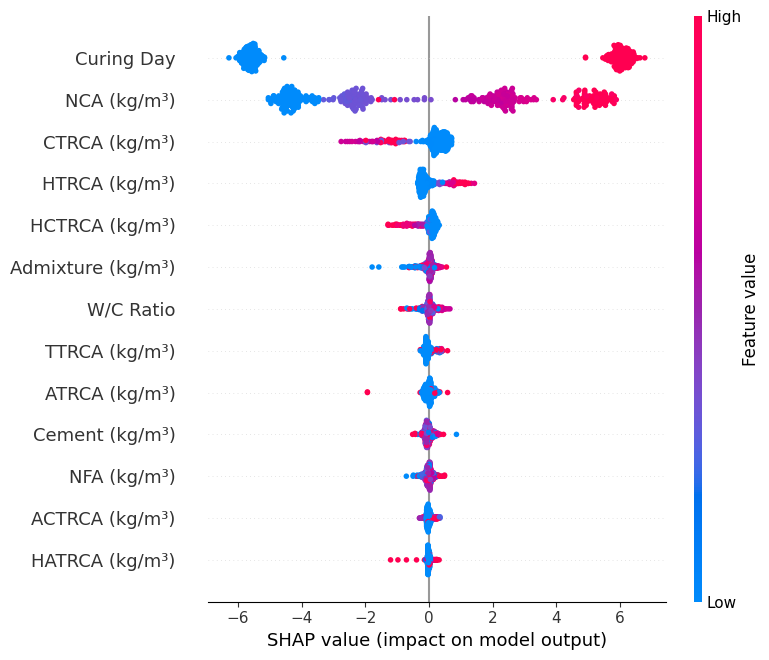

In [46]:
shap.summary_plot(shap_values, X_train)

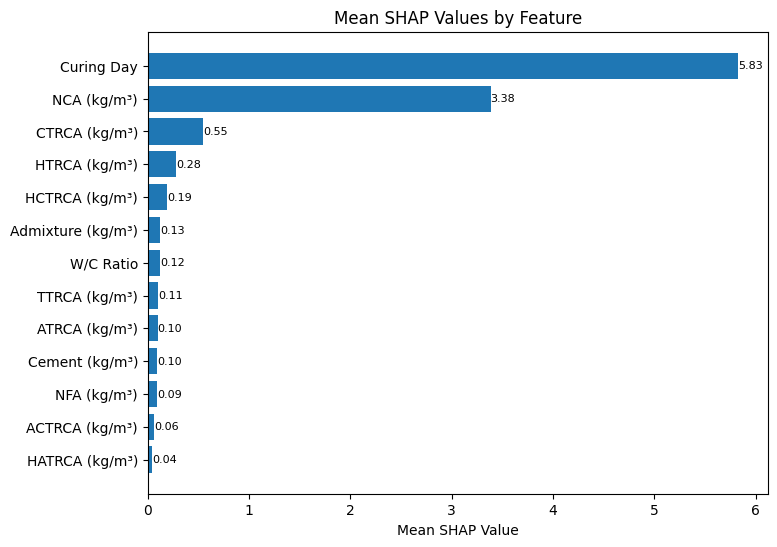

In [49]:
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_names = X_train.columns

mean_shap_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': mean_shap_values
}).sort_values(by='Mean SHAP Value', ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.barh(mean_shap_df['Feature'], mean_shap_df['Mean SHAP Value'])
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values by Feature')
plt.gca().invert_yaxis()

# Annotate bars with mean SHAP values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=8)

plt.show()

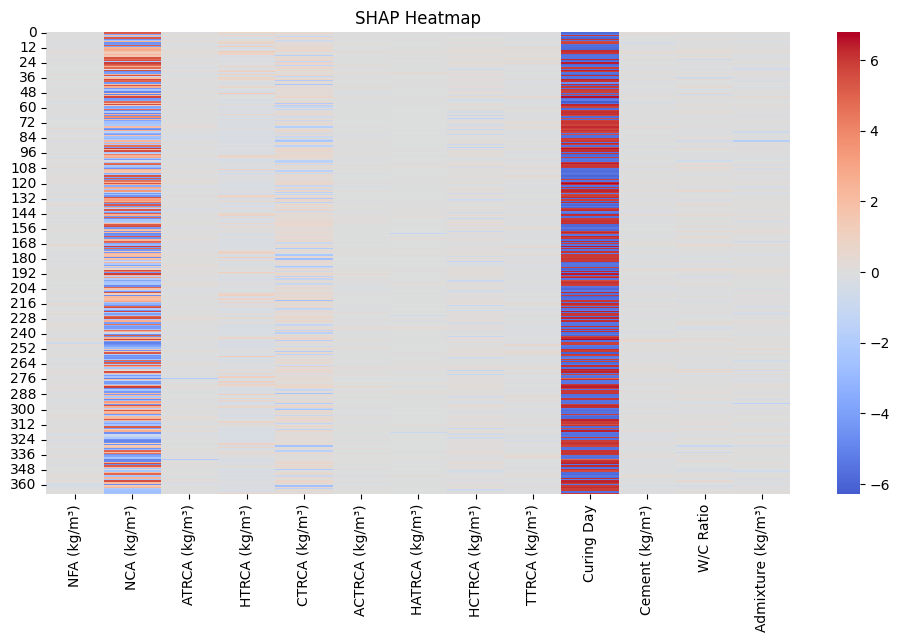

In [51]:
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(shap_df, cmap="coolwarm", center=0, annot=False)
plt.title('SHAP Heatmap')
plt.show()

In [53]:
feature_to_plot = X_train.columns[1]
shap_values_df = pd.DataFrame({
    'SHAP Value': shap_values.values[:, X_train.columns.get_loc(feature_to_plot)],
    feature_to_plot: X_train[feature_to_plot]
})

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=shap_values_df[feature_to_plot],
    y=shap_values_df['SHAP Value'],
    hue=shap_values_df[feature_to_plot],
    palette="coolwarm",
    edgecolor=None,
    alpha=0.6
)
plt.title(f'SHAP Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('SHAP Value')
plt.show()